In [1]:
import numpy as np
import matplotlib.pyplot as plt
from snake import Snake2D, SnakeParams
import cv2
from aux_functions import *
# %matplotlib inline

(450, 600)


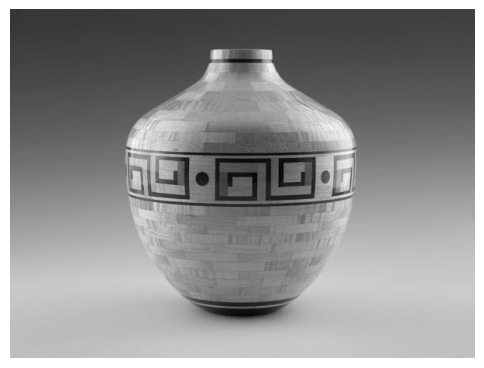

In [2]:
# Load and display image
image_path = "./vase.png"
img = cv2.imread(image_path, 0)  # Read as grayscale
print(img.shape)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (295, 2)


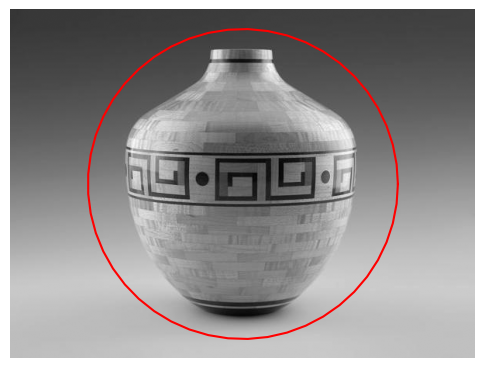

In [3]:
initial_points1 = [
    [150, 110],
    [325, 90],
    [437, 115],
    [690, 70],
    [770, 231],
    [750, 710],
    [437, 760],
    [150, 730],
    [65, 372],
    [150, 110],
]

initial_points2 = [
    [50, 50],
    [50, 780],
    [780, 780],
    [780, 50],
]

V_circle = init_circle((img.shape[1]//2, img.shape[0]//2), 200, num_points=50)

V_subdivided = subdivision(V_circle, k=4)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided

# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()


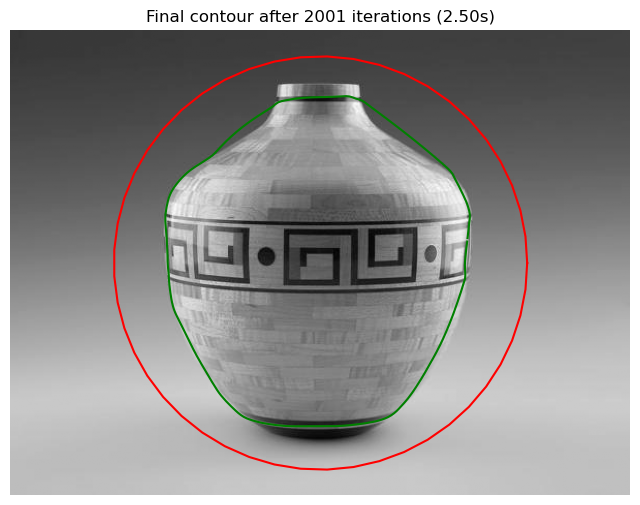

In [4]:
# Configure snake parameters
params = SnakeParams(
    alpha=800.0,  # Stronger continuity
    beta=500.0,  # Stronger curvature
    gamma=0.0005,  # Smaller time step
    sigma=0.05,  # Less blur
    kb=-15.0,  # Weaker balloon force
    sb=100.0,  # More smoothing
    max_iter=2000,
    verbose=True,
    cubic_spline_refinement=True,
)

# Create and evolve snake
snake = Snake2D(img, v_init, params)
v_final, iters, duration = snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

(886, 886)


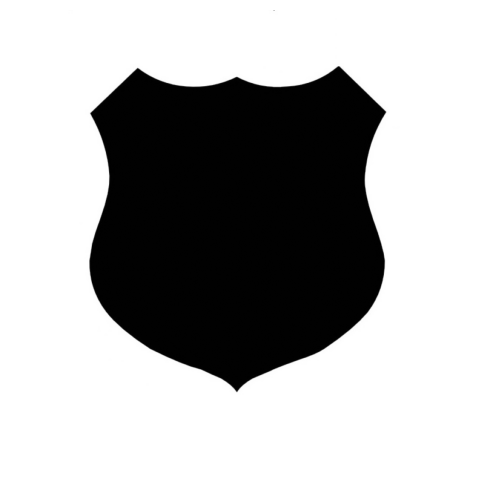

In [5]:
# Load and display image
image_path = "./shield.png"
img = cv2.imread(image_path, 0)  # Read as grayscale
print(img.shape)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (1177, 2)


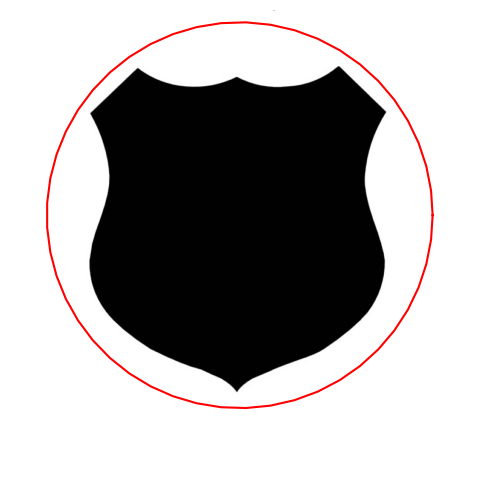

In [6]:
initial_points1 = [
    [150, 110],
    [325, 90],
    [437, 115],
    [690, 70],
    [770, 231],
    [750, 710],
    [437, 760],
    [150, 730],
    [65, 372],
    [150, 110],
]

initial_points2 = [
    [75, 75],
    [75, 755],
    [755, 755],
    [755, 75],
]


V_circle = init_circle((img.shape[1]//2-3, img.shape[0]//2-50), 370, num_points=50)
V_subdivided = subdivision(V_circle, k=2)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided
# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()


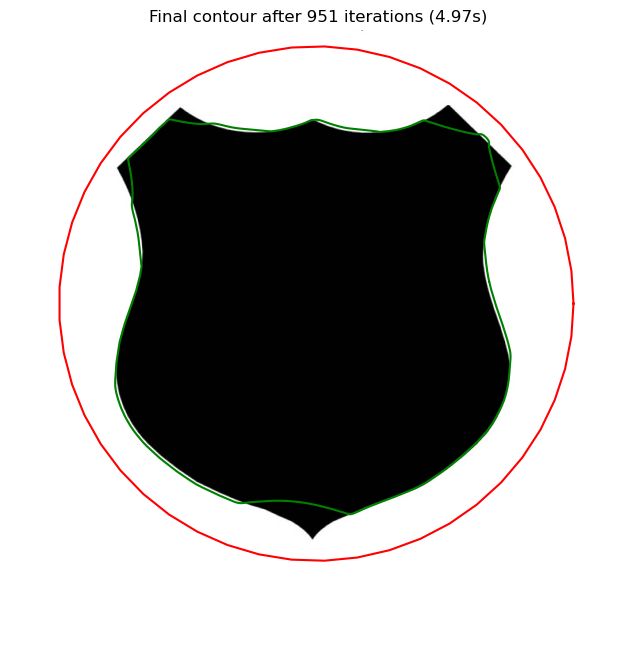

In [7]:
# Configure snake parameters
params = SnakeParams(
    alpha=1750.0,  # Stronger continuity
    beta=700.0,  # Stronger curvature
    gamma=0.0015,  # Smaller time step
    sigma=1.4,  # Less blur
    kb=-100.0,  # Weaker balloon force
    sb=100.0,  # More smoothing
    max_iter=950,
    verbose=True,
    cubic_spline_refinement=True,
)

# Create and evolve snake
snake = Snake2D(img, v_init, params)
v_final, iters, duration = snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

(800, 800)


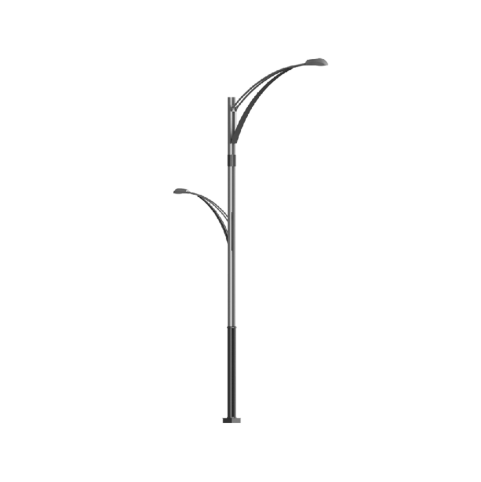

In [8]:
# Load and display image
image_path = "./poste1.png"
img = cv2.imread(image_path, 0)  # Read as grayscale
print(img.shape)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (1101, 2)


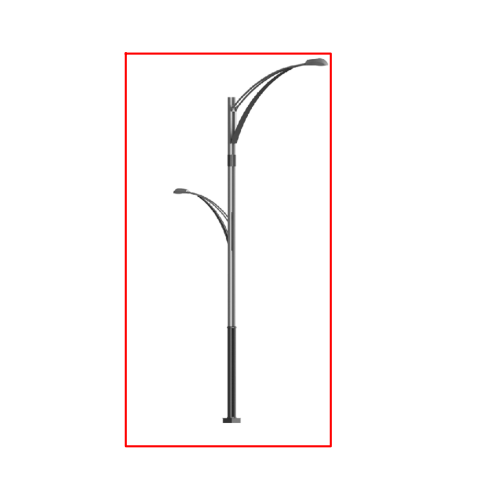

In [9]:
initial_points2 = [
    [200, 75],
    [200, 755],
    [555, 755],
    [555, 75],
]

V_circle = init_circle((img.shape[1]//2, img.shape[0]//2), 360, num_points=50)
V_rect = init_rectangle(initial_points2, 50)

V_subdivided = subdivision(V_rect, k=2)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided
# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()


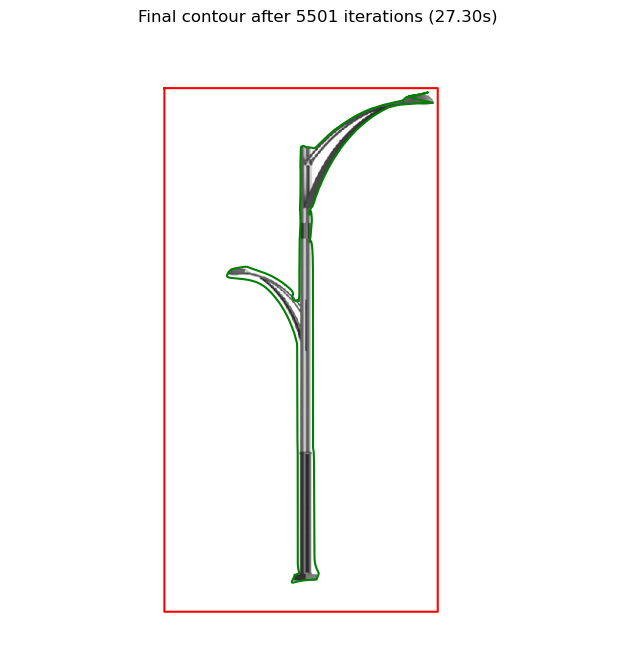

In [10]:
# Configure snake parameters
params = SnakeParams(
    alpha=300.0,  # Stronger continuity
    beta=100.0,  # Stronger curvature
    gamma=0.001,  # Smaller time step
    sigma=1.7,  # Less blur
    kb=-50.0,  # Weaker balloon force
    sb=50.0,  # More smoothing
    max_iter=5500,
    verbose=True,
    cubic_spline_refinement=True,
)

# Create and evolve snake
snake = Snake2D(img, v_init, params)
v_final, iters, duration = snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()

(800, 800)


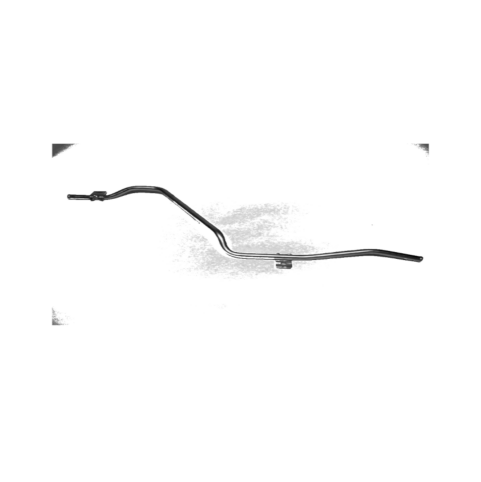

In [11]:
# Load and display image
image_path = "./tubimg1.png"
img = cv2.imread(image_path, 0)  # Read as grayscale
print(img.shape)
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.axis("off")
plt.show()

Pontos subdivididos: (1101, 2)


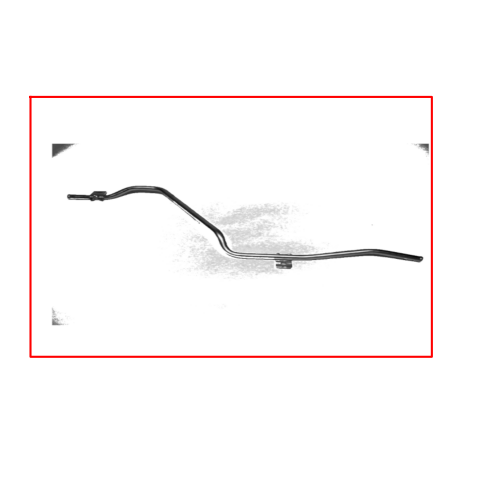

In [12]:
initial_points2 = [
    [35, 150],
    [35, 600],
    [730, 600],
    [730, 150],
]

V_circle = init_circle((img.shape[1]//2, img.shape[0]//2), 360, num_points=50)
V_rect = init_rectangle(initial_points2, 50)

V_subdivided = subdivision(V_rect, k=2)
print("Pontos subdivididos:", V_subdivided.shape)
v_init = V_subdivided
# Display initial contour
plt.figure(figsize=(6, 6))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.axis("off")
plt.show()


In [ ]:
# Configure snake parameters
params = SnakeParams(
    alpha=200.0,  # Stronger continuity
    beta=75.0,  # Stronger curvature
    gamma=0.001,  # Smaller time step
    sigma=1.5,  # Less blur
    kb=-50.0,  # Weaker balloon force
    sb=100.0,  # More smoothing
    max_iter=5500,
    verbose=True,
    cubic_spline_refinement=True,
)

# Create and evolve snake
snake = Snake2D(img, v_init, params)
v_final, iters, duration = snake.evolve()

# Display result
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap="gray")
plt.plot(v_init[:, 0], v_init[:, 1], "r-")
plt.plot(v_final[:, 0], v_final[:, 1], "g-")

plt.title(f"Final contour after {iters} iterations ({duration:.2f}s)")
plt.axis("off")
plt.show()